In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.patches import Polygon


In [2]:

def mplot_india(plotno, fig, nrows=1, ncols=2):
 ax = fig.add_subplot(nrows, ncols, plotno)
 map = Basemap(width=1200000, height=900000, projection='lcc',resolution='l', llcrnrlon=67, llcrnrlat=5, urcrnrlon=99, urcrnrlat=37, lat_0=28, lon_0=77)
 map.readshapefile('C:/Users/taiwoajayi/Documents/Grace/India_Boundary/India_Boundary', name='country',drawbounds=True, linewidth=0.5)
 map.drawcoastlines(linewidth=0.1)
 # map.drawcountries(linewidth=0.3)
 map.fillcontinents(color='grey', alpha=0.05, lake_color='aqua')
 map.drawparallels(np.arange(90, -90, -5), linewidth=0.05, labels=[1, 0, 0, 0], size=4, dashes=(15, 15))
 map.drawmeridians(np.arange(-180, 180, 5), linewidth=0.05, labels=[0, 0,0, 1], size=4, dashes=(15, 15))
 return map, ax


In [3]:

def mplot_amazon(plotno, fig, nrows=1, ncols=2):
 ax = fig.add_subplot(nrows, ncols, plotno)
 
 map = Basemap(projection='merc', resolution='l',llcrnrlon=-85, llcrnrlat=-40, urcrnrlon=-30, urcrnrlat=15)
 map.drawcoastlines(linewidth=0.3)
 map.drawcountries(linewidth=0.3)
 map.fillcontinents(color='grey', alpha=0.05, lake_color='aqua')
 map.drawparallels(np.arange(90, -90, -5), linewidth=0.05, labels=[1, 0,0, 0], size=4, dashes=(15, 15))
 map.drawmeridians(np.arange(-180, 180, 5), linewidth=0.05, labels=[0, 0,0, 1], size=4, dashes=(15, 15))
 return map, ax


In [4]:

data = xr.open_dataset('C:/Users/taiwoajayi/Documents/Grace/GRCTellus.JPL.200204_202306.GLO.RL06.1M.MSCNv03CRI.nc')
data2022 = data.sel(time=data.time.dt.year.isin([2022]))
sc = xr.open_dataset('C:/Users/taiwoajayi/Documents/Grace/CLM4.SCALE_FACTOR.JPL.MSCNv03CRI.nc')
data2022final = sc.scale_factor * data2022.lwe_thickness
lon = data2022final.lon.values
lat = data2022final.lat.values
lon, lat = np.meshgrid(lon, lat)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
fdmonths = ['Jan-Feb','Feb-Mar','Mar-Apr','Apr-May','May-Jun','Jun-Jul','Jul-Aug','Aug-Sep','Sep-Oct','Oct-Nov','Nov-Dec','Dec-Jan']



0
1
2
3
4
5
6
7
8
9
10
11
1 0
2 1
3 2
4 3
5 4
6 5
7 6
8 7
9 8
10 9
11 10
12 0


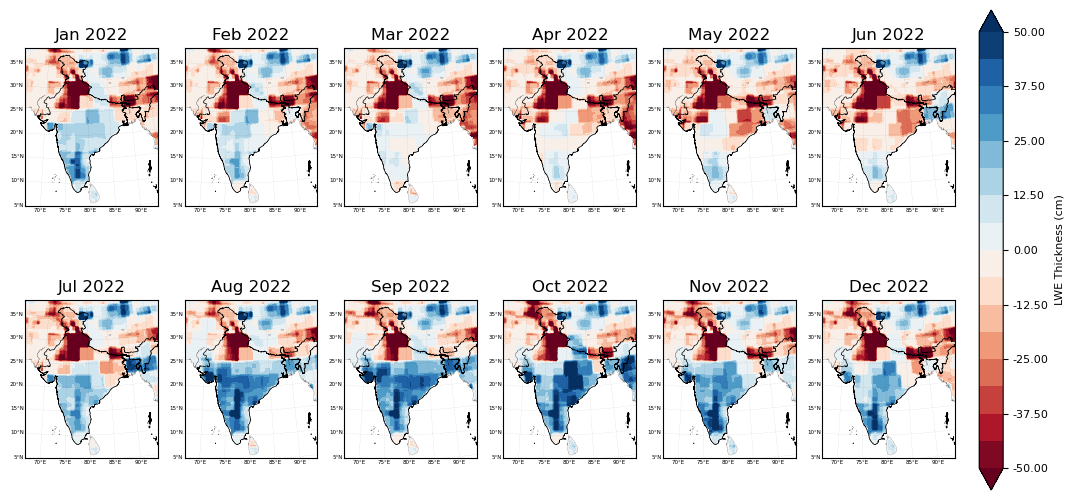

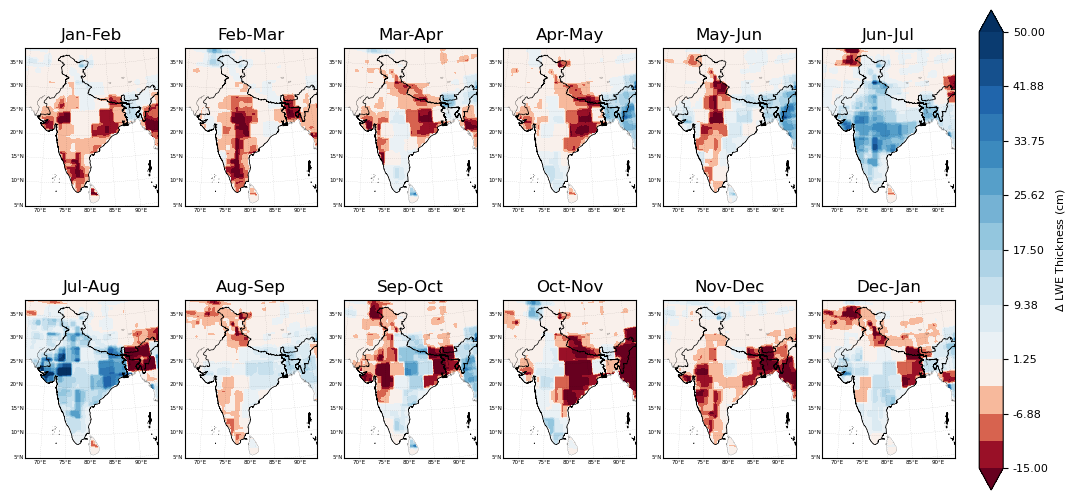

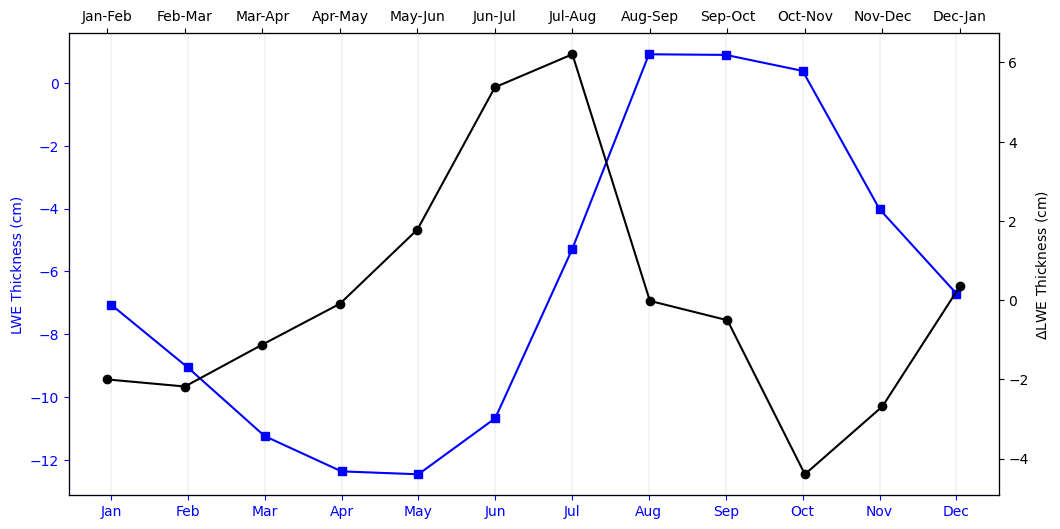

In [6]:
#for India

fig = plt.figure(figsize=(12, 6))
for i in range(12):
 print(i)
 map, ax1 = mplot_india(i + 1, fig, 2, 6)
 c = map.contourf(lon, lat, data2022final.isel(time=i), latlon=True,
 cmap='RdBu',levels=np.linspace(-50, 50, 17), extend='both')
 ax1.set_title(f'{months[i]} 2022')
#cax = ax1.inset_axes([1.04, 0.1, 0.05, 0.8])
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
cax.yaxis.set_ticks_position('right')
fig.colorbar(c, cax=cax, label='LWE Thickness (cm)', format='%0.2f')
cax.tick_params(labelsize=8)
cax.yaxis.label.set_size(8)



import matplotlib.colors as mc
diffdata=[]
fig = plt.figure(figsize=(12, 6))

for i in range(12):
 print(i+1,i) if i+1!=12 else print(i+1,0)
 map, ax1 = mplot_india(i + 1, fig, 2, 6)
 data = (data2022final.isel(time=i+1) - data2022final.isel(time=i)) if i+1!= 12 else (data2022final.isel(time=11) - data2022final.isel(time=0))
 c = map.contourf(lon, lat, data, latlon=True, cmap='RdBu',
 levels=np.linspace(-15, 50, 17), extend='both',
 norm=mc.TwoSlopeNorm(vmin=-15,vmax=50,vcenter=0))
 ax1.set_title(f'{fdmonths[i]}')
 diffdata.append(data.values)

#cax = ax1.inset_axes([1.04, 0.1, 0.05, 0.8])
cax.yaxis.set_ticks_position('right')
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
fig.colorbar(c, ax=ax1, cax=cax, label='$\Delta$ LWE Thickness (cm)', format='%0.2f')
cax.tick_params(labelsize=8)
cax.yaxis.label.set_size(8)



#ind_data = data2022final.sel(lon=slice(-85+180,-30+180),lat=slice(-40,15))
ind_data = data2022final.sel(lon=slice(60,100),lat=slice(5,40))
monmean = np.nanmean(ind_data.values,axis=(0,1))
fdmonmean = [monmean[i+1]- monmean[i] if i+1!=12 else monmean[11]-monmean[0] for i in range(12)]

fig = plt.figure(figsize=(12, 6))
plt.plot(range(12),monmean,marker='s',c='b')
plt.xticks(range(12),months)
plt.gca().spines['left'].set_color('b')
plt.gca().spines['bottom'].set_color('b')
plt.gca().tick_params(axis='both',colors='blue')
plt.grid(which='major',lw=0.2,axis='x')
plt.ylabel('LWE Thickness (cm)',color='b',)

diffax1 = plt.gca().twiny()
diffax1.set_xticks(range(12))
diffax1.set_xlim(-0.5,11.5)
diffax1.set_xticklabels(fdmonths)

diffax = plt.gca().twinx()
diffax.plot(range(12),fdmonmean,marker='o',c='k')
diffax.set_ylabel(r'$\Delta$'+'LWE Thickness (cm)',color='k')

diffax.spines['right'].set_color('k')
diffax.spines['top'].set_color('k')
diffax1.tick_params(axis='x',colors='k')
diffax.tick_params(axis='y',colors='k')


0
1
2
3
4
5
6
7
8
9
10
11
1 0
2 1
3 2
4 3
5 4
6 5
7 6
8 7
9 8
10 9
11 10
12 0


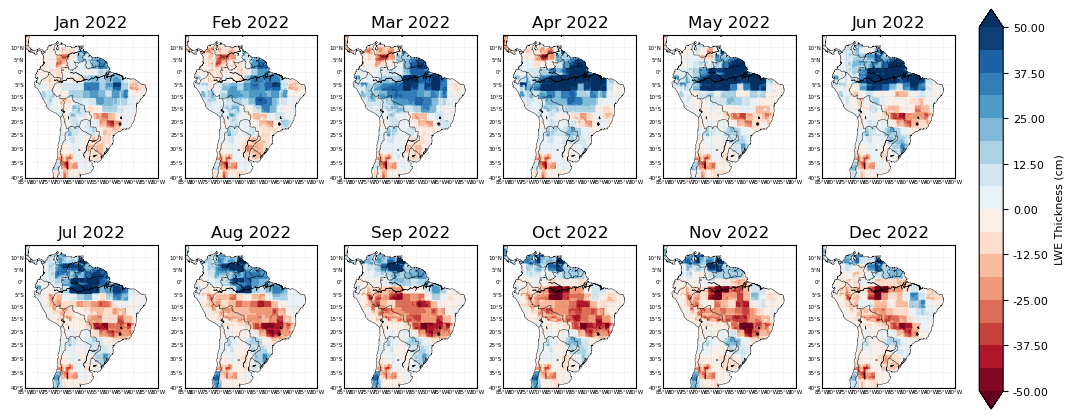

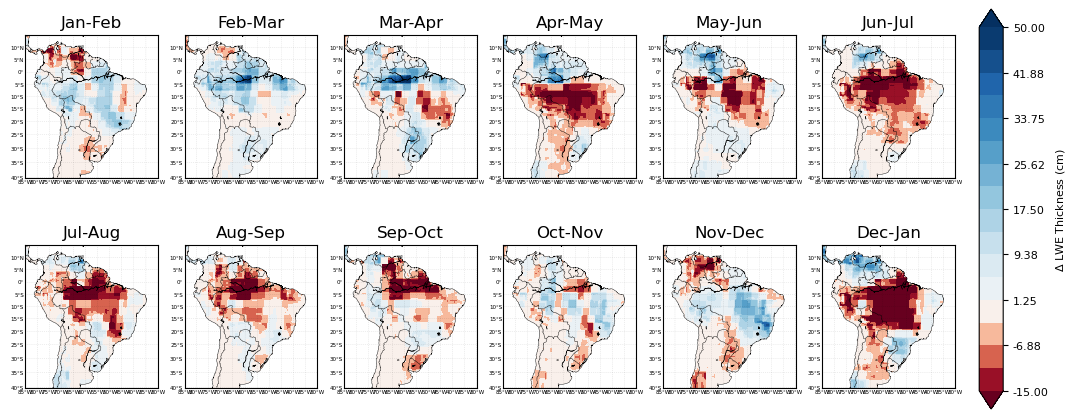

In [ ]:

#for AMAZON

fig = plt.figure(figsize=(12, 5))
for i in range(12):
 print(i)
 map, ax1 = mplot_amazon(i + 1, fig, 2, 6)
 c = map.contourf(lon, lat, data2022final.isel(time=i), latlon=True,
 cmap='RdBu',levels=np.linspace(-50, 50, 17), extend='both')
 ax1.set_title(f'{months[i]} 2022')
#cax = ax1.inset_axes([1.04, 0.1, 0.05, 0.8])
cax.yaxis.set_ticks_position('right')
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
fig.colorbar(c, cax=cax, label='LWE Thickness (cm)', format='%0.2f')
cax.tick_params(labelsize=8)
cax.yaxis.label.set_size(8)



import matplotlib.colors as mc
diffdata=[]
fig = plt.figure(figsize=(12, 5))

for i in range(12):
 print(i+1,i) if i+1!=12 else print(i+1,0)
 map, ax1 = mplot_amazon(i + 1, fig, 2, 6)
 data = (data2022final.isel(time=i+1) - data2022final.isel(time=i)) if i+1!= 12 else (data2022final.isel(time=11) - data2022final.isel(time=0))
 c = map.contourf(lon, lat, data, latlon=True, cmap='RdBu',
 levels=np.linspace(-15, 50, 17), extend='both',
 norm=mc.TwoSlopeNorm(vmin=-15,vmax=50,vcenter=0))
 ax1.set_title(f'{fdmonths[i]}')
 diffdata.append(data.values)

#cax = ax1.inset_axes([1.04, 0.1, 0.05, 0.8])
cax.yaxis.set_ticks_position('right')
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
fig.colorbar(c, ax=ax1, cax=cax, label='$\Delta$ LWE Thickness (cm)', format='%0.2f')
cax.tick_params(labelsize=8)
cax.yaxis.label.set_size(8)



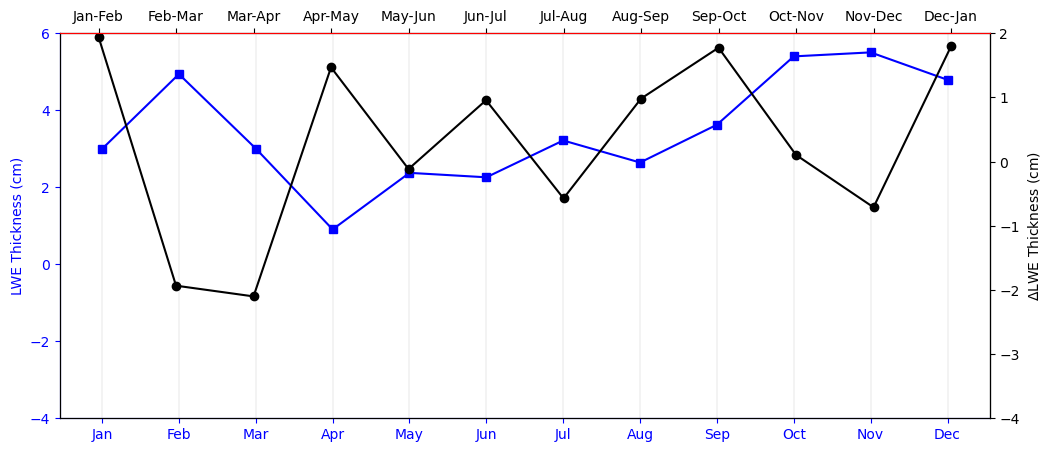

In [ ]:
amz_data = data2022final.sel(lon=slice(-85+180,-30+180),lat=slice(-40,15))
#ind_data = data2022final.sel(lon=slice(-65,100),lat=slice(5,40))
monmean = np.nanmean(amz_data.values,axis=(0,1))
fdmonmean = [monmean[i+1]- monmean[i] if i+1!=12 else monmean[11]-monmean[0] for i in range(12)]

fig = plt.figure(figsize=(12, 5))
plt.plot(range(12),monmean,marker='s',c='b')
plt.xticks(range(12),months)
plt.gca().spines['left'].set_color('b')
plt.gca().spines['bottom'].set_color('b')
plt.gca().tick_params(axis='both',colors='blue')
plt.grid(which='major',lw=0.2,axis='x')
plt.ylabel('LWE Thickness (cm)',color='b')

diffax1 = plt.gca().twiny()
diffax1.set_xticks(range(12))
diffax1.set_xlim(-0.5,11.5)
diffax1.set_xticklabels(fdmonths)
diffax1.set_ylim(-4,6)

diffax = plt.gca().twinx()
diffax.plot(range(12),fdmonmean,marker='o',c='k')
diffax.set_ylabel(r'$\Delta$'+'LWE Thickness (cm)',color='k')
diffax.set_ylim(-4,2)

diffax.spines['right'].set_color('k')
diffax.spines['top'].set_color('r')
diffax1.tick_params(axis='x',colors='k')
diffax.tick_params(axis='y',colors='k')
